In [ ]:
!pip install shap

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import shap

import warnings

/media/ayan/Ayan/conda-ins/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Student_Performance_Data_Preprocessed.csv')
df.head()

,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Overall_Class
0,0,4.17,4.84,0,0,3,2,0,3,0,3,1,2
1,1,4.92,5.00,2,1,3,0,0,3,0,3,1,2
2,0,5.00,4.83,1,0,3,0,2,3,0,4,1,2
3,0,4.00,4.50,3,1,5,2,2,3,0,5,1,2
4,1,2.19,3.17,1,0,3,0,1,3,0,3,1,2


In [ ]:
model_path_gbc = 'saved_models/GradientBoosting_model.pkl'
gbc = joblib.load(model_path_gbc)
print(f"✅ Loaded model from: {model_path_gbc}")

✅ Loaded model from: saved_models/GradientBoosting_model.pkl


In [26]:
model_path_rfc = 'saved_models/RandomForestClassifier_model.pkl'
rfc = joblib.load(model_path_rfc)
print(f"✅ Loaded model from: {model_path_rfc}")

✅ Loaded model from: saved_models/RandomForestClassifier_model.pkl


In [7]:
X = df.drop(['Overall_Class'], axis=1)
y = df['Overall_Class'].astype(int)

In [ ]:
# --- Show model feature importances ---
importances = gbc.feature_importances_
features = X.columns

feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)
print("\n Feature Importances (GradientBoost):")
print(feature_importances)


 Feature Importances:
Attendance     0.326580
Preparation    0.172065
SSC            0.134477
HSC            0.119897
English        0.055609
Computer       0.044618
Gaming         0.044202
Income         0.037579
Gender         0.027151
Extra          0.015174
Job            0.013804
Hometown       0.008845
dtype: float64


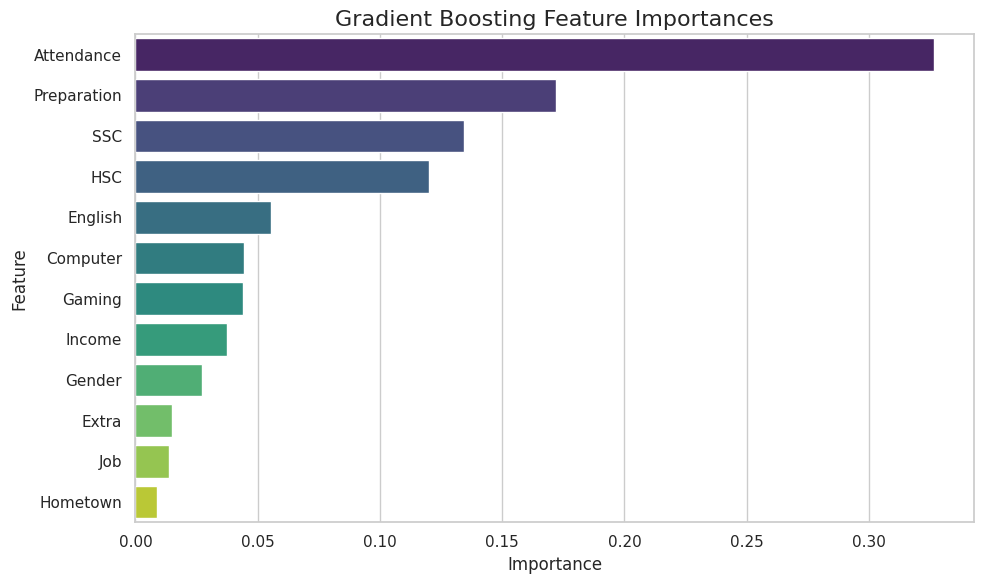

Feature Importances plot saved as: visualizations/feature_importances/GradientBoosting_feature_importances.png


In [17]:
# --- Plot Feature Importances as a Horizontal Bar ---
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(
    x=feature_importances.values,
    y=feature_importances.index,
    palette="viridis"
)

plt.title("Gradient Boosting Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()

plt.savefig("visualizations/feature_importances/GradientBoosting_feature_importances.png", dpi=300)
plt.show()

print("Feature Importances plot saved as: visualizations/feature_importances/GradientBoosting_feature_importances.png")

In [35]:
# --- Show model feature importances ---
importances = rfc.feature_importances_
features = X.columns

feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)
print("\n Feature Importances (Random Forest):")
print(feature_importances)


 Feature Importances (Random Forest):
Attendance     0.190424
HSC            0.162907
SSC            0.114351
Preparation    0.086987
Computer       0.086168
Gaming         0.077356
Income         0.077252
English        0.072315
Extra          0.040719
Gender         0.040144
Hometown       0.035390
Job            0.015986
dtype: float64


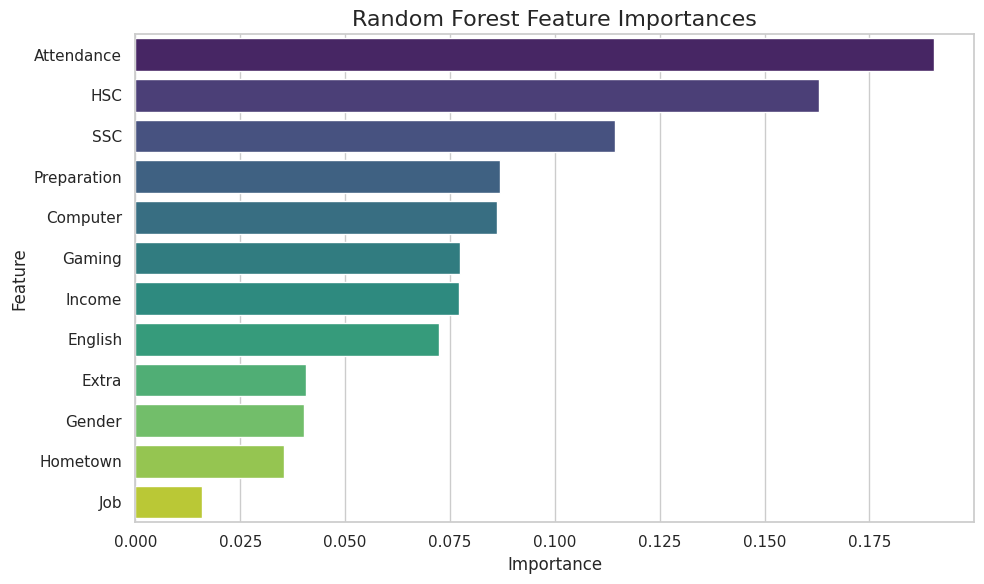

Feature Importances plot saved as: visualizations/feature_importances/RandomForest_feature_importances.png


In [36]:
# --- Plot Feature Importances as a Horizontal Bar ---
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(
    x=feature_importances.values,
    y=feature_importances.index,
    palette="viridis"
)

plt.title("Random Forest Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()

plt.savefig("visualizations/feature_importances/RandomForest_feature_importances.png", dpi=300)
plt.show()

print("Feature Importances plot saved as: visualizations/feature_importances/RandomForest_feature_importances.png")

In [28]:
X_test = pd.read_csv('data/X_Test_Preprocessed.csv')
X_test.head()

,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra
0,0,0.502191,0.326389,0,0,4,0,1,3,0,3,0
1,0,1.603117,-0.271870,0,0,3,2,1,3,0,3,1
2,0,1.508210,0.668251,1,1,4,0,2,2,0,4,0
3,0,1.603117,0.668251,2,1,4,2,1,3,1,5,1
4,0,1.603117,0.668251,1,1,2,0,0,3,0,4,1


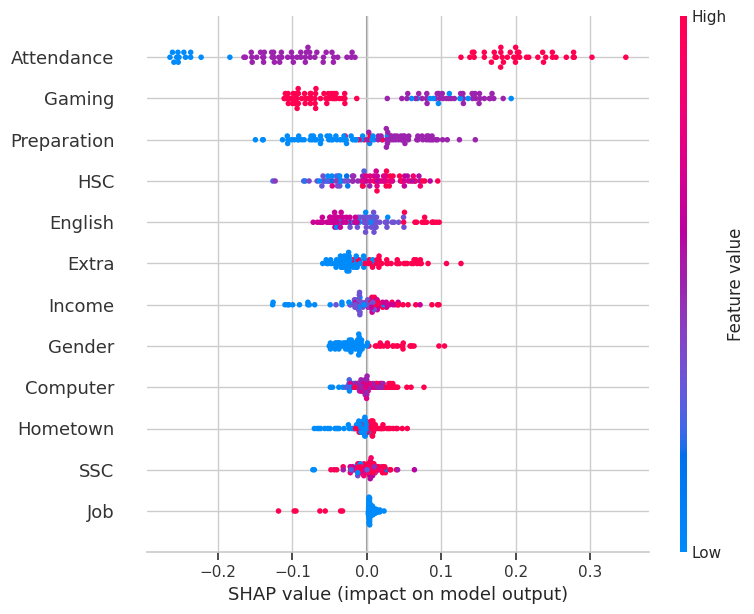

In [33]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(
    shap_values[:, :, 2],
    X_test,
    plot_type="dot"  
)
